Data exploration:

In [96]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
ds = pd.read_csv("./data-set.csv")



# ds.head()
print(ds["Attrition"].unique())


['Yes' 'No']


Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
EnvironmentSatisfaction: 1 'Low' - 2 'Medium' - 3 'High' - 4 'Very High'
JobInvolvement: 1 'Low' - 2 'Medium' - 3 'High' - 4 'Very High'
JobSatisfaction: 1 'Low' - 2 'Medium' - 3 'High' - 4 'Very High'
PerformanceRating: 1 'Low' - 2 'Good' - 3 'Excellent' - 4 'Outstanding'
RelationshipSatisfaction: 1 'Low' - 2 'Medium' - 3 'High' - 4 'Very High'
WorkLifeBalance: 1 'Bad' - 2 'Good' - 3 'Better' - 4 'Best'

In [97]:
ds.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [98]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [99]:
# Applied attrition filter to transform from yes/no values to 1/0
ds["Attrition"] = ds["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)


# Transform non-ordanal 
priority_map = {
    "Non-Travel":0,
    "Travel_Rarely":1,
    "Travel_Frequently":2,
}

ds["BusinessTravel"] = ds["BusinessTravel"].map(priority_map)
ds.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [100]:
textual_columns = ds.select_dtypes(include=['object']).columns
print(textual_columns)
lb = LabelEncoder()
for column in textual_columns:
    ds[column] = lb.fit_transform(ds[column])
    


Index(['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'Over18', 'OverTime'],
      dtype='object')


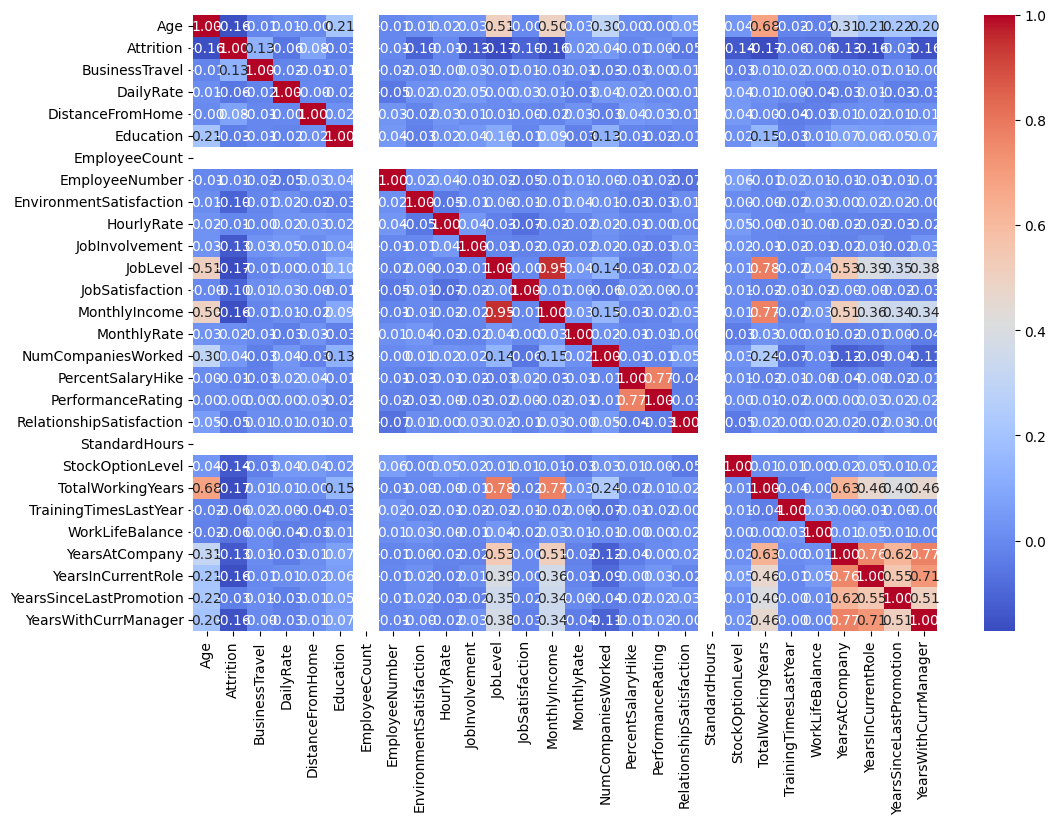

In [101]:
corr = ds.drop(columns=["EducationField","Department","Gender","JobRole","MaritalStatus","Over18","OverTime"]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [102]:
# Data Cleaning
print(f"Null Values Count: {ds.isnull().sum().sum()}")
print(f"Duplicate Values Count: {ds.duplicated().sum().sum()}")

Null Values Count: 0
Duplicate Values Count: 0


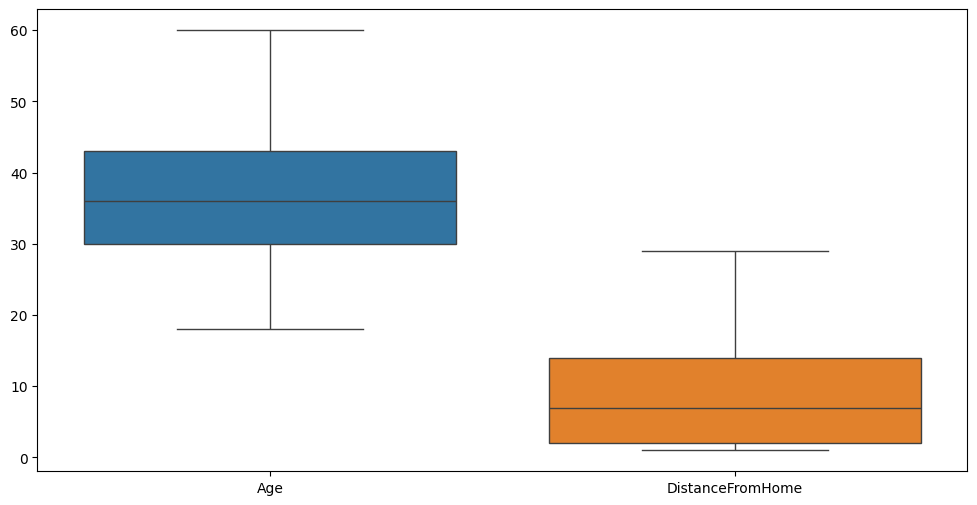

In [103]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=ds[["Age", "DistanceFromHome"]])  # Replace with columns you want
plt.show() 

In [104]:
# Splitting dataset into training and testing sets
X = ds.drop(columns=['Attrition','EmployeeCount'])  # Features
y = ds['Attrition']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
print(ds['Attrition'].value_counts())

Attrition
0    1233
1     237
Name: count, dtype: int64


In [111]:
# Steps 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy {accuracy}")

Accuracy 0.8673469387755102


c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
